In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import plotly.express as px
from wordcloud import WordCloud
warnings.filterwarnings("ignore")



df = pd.read_csv(r'C:\Users\mbugu\OneDrive\Desktop\ML DATASET\Global Earthquake Data\earthquakes.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

           id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://eart

In [5]:
with open(r'C:\Users\mbugu\OneDrive\Desktop\ML DATASET\Global Earthquake Data\earthquakes_column_descriptors.txt', 'r') as file:
    column_descriptors = file.read()
print(column_descriptors)

Column Descriptors:
id: Unique identifier for each earthquake event.
magnitude: The strength of the earthquake on the Richter scale.
type: Type of seismic event (earthquake, explosion, etc.).
title: Title of the earthquake event (place and magnitude).
date: Date when the earthquake occurred.
time: Time when the earthquake occurred.
updated: Last updated timestamp for the event.
url: Link to the earthquake event's details.
detailUrl: Additional details URL.
felt: Number of people who reported feeling the earthquake.
cdi: Community Determined Intensity, how strongly the event was felt.
mmi: Modified Mercalli Intensity, scale used to measure earthquake intensity.
alert: Alert level (green, yellow, orange, red).
status: Status of the event (reviewed, automatic).
tsunami: Tsunami risk flag (0 = no risk, 1 = risk).
sig: Significance of the earthquake, based on magnitude and impact.
net: Network that detected the earthquake.
code: Code assigned by the network.
ids: IDs of other events related

In [7]:
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())

id                 0
magnitude          0
type               0
title              0
date               0
time               0
updated            0
url                0
detailUrl          0
felt               0
cdi                0
mmi                0
alert              0
status             0
tsunami            0
sig                0
net                0
code               0
ids                0
sources            0
types              0
nst                0
dmin               0
rms                0
gap                0
magType            0
geometryType       0
depth              0
latitude           0
longitude          0
place              0
distanceKM         0
placeOnly          0
location           0
continent          0
country            0
subnational        0
city               0
locality           0
postcode           0
what3words         0
timezone           0
locationDetails    0
dtype: int64


In [8]:
print(cleaned_df.describe())

       magnitude          time       updated           felt        cdi  \
count  68.000000  6.800000e+01  6.800000e+01      68.000000  68.000000   
mean    4.466324  1.716965e+12  1.720941e+12    5996.588235   5.382353   
std     0.432873  8.407731e+09  6.833506e+09   22909.176254   0.914712   
min     3.500000  1.693191e+12  1.705147e+12      10.000000   4.000000   
25%     4.100000  1.708152e+12  1.714665e+12      82.500000   5.000000   
50%     4.440000  1.721876e+12  1.725126e+12     269.000000   5.000000   
75%     4.800000  1.723004e+12  1.726348e+12    2042.000000   6.000000   
max     5.220000  1.726534e+12  1.726672e+12  183786.000000   7.000000   

             mmi    tsunami          sig         nst       dmin        rms  \
count  68.000000  68.000000    68.000000   68.000000  68.000000  68.000000   
mean    5.294118   0.147059   592.323529   57.632353   0.142172   0.386324   
std     0.754268   0.356798   296.328753   45.568353   0.223281   0.287547   
min     4.000000   0.

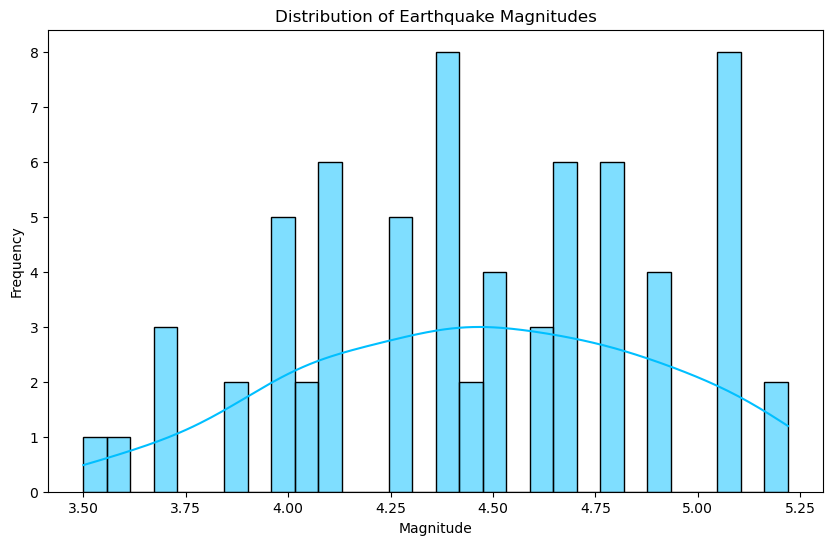

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['magnitude'], bins=30, kde=True, color='#00BFFF')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

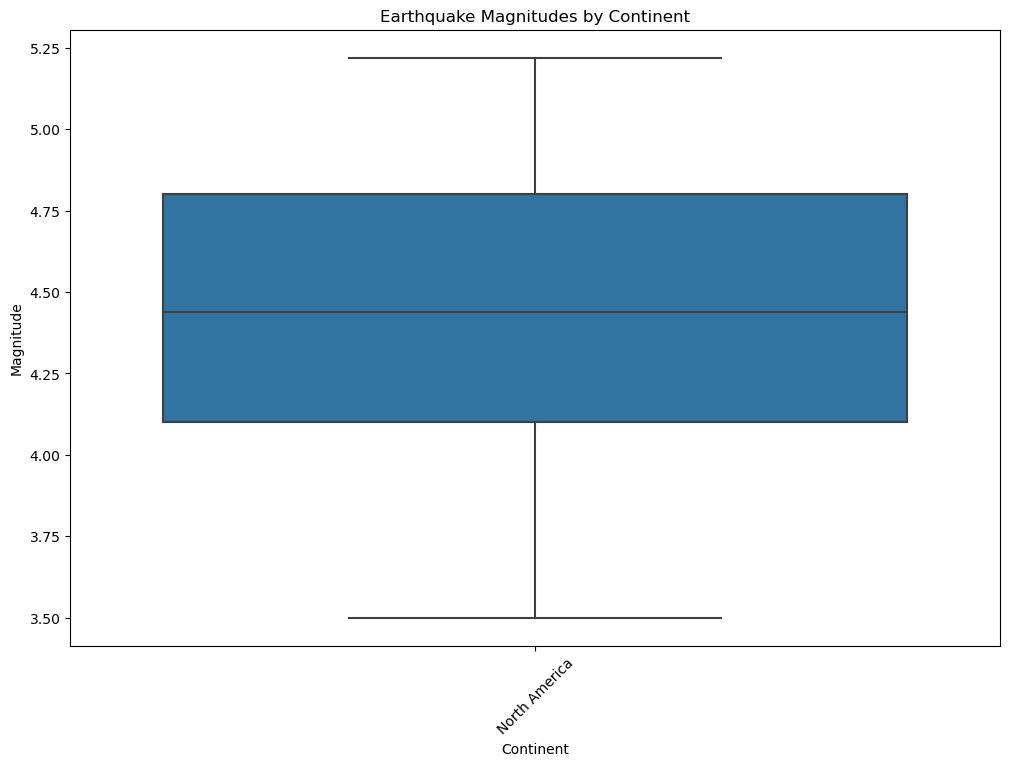

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='magnitude', data=cleaned_df)
plt.title('Earthquake Magnitudes by Continent')
plt.xlabel('Continent')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()

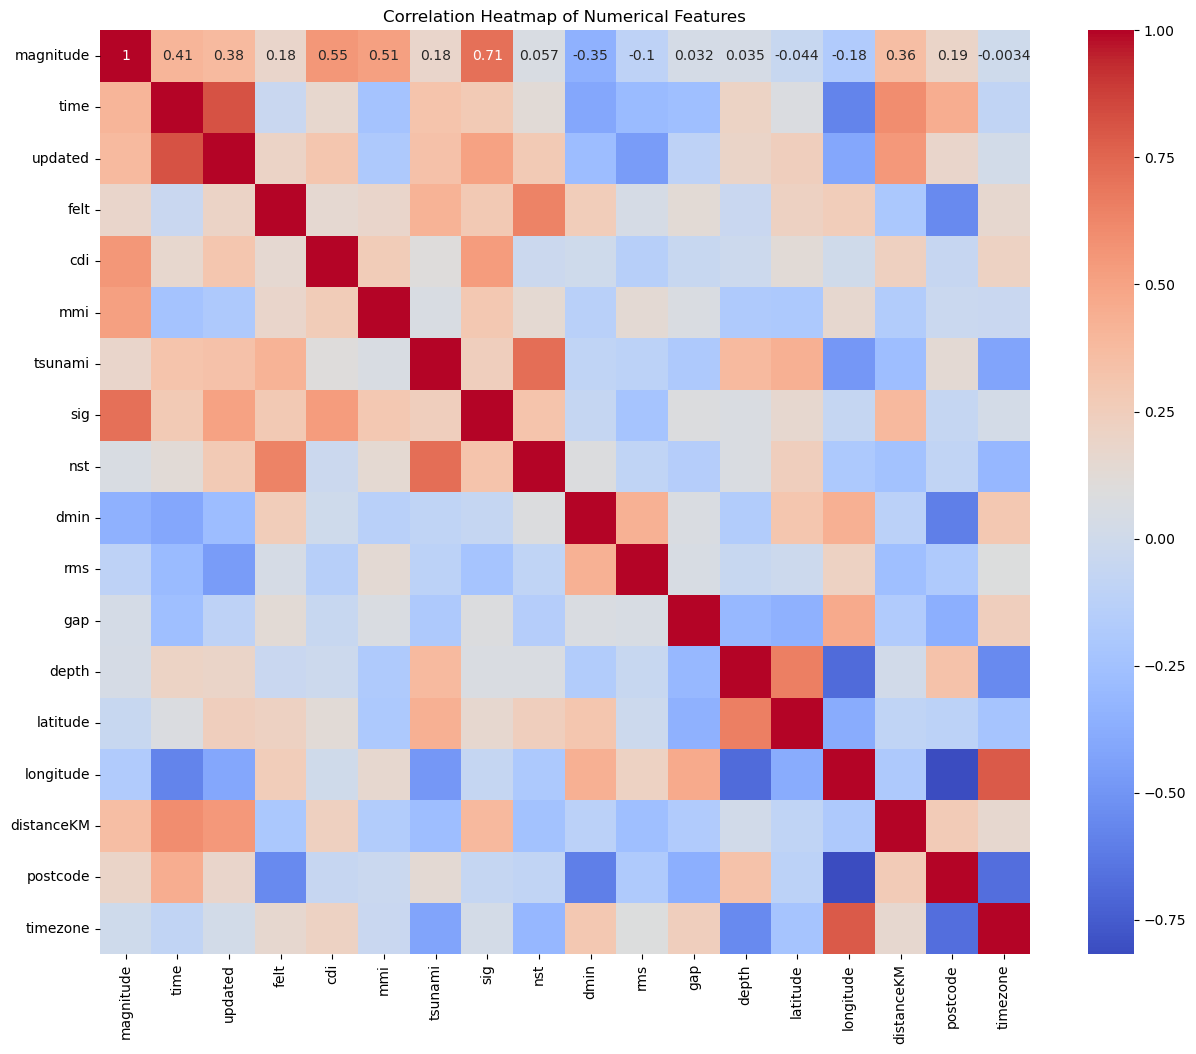

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(cleaned_df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

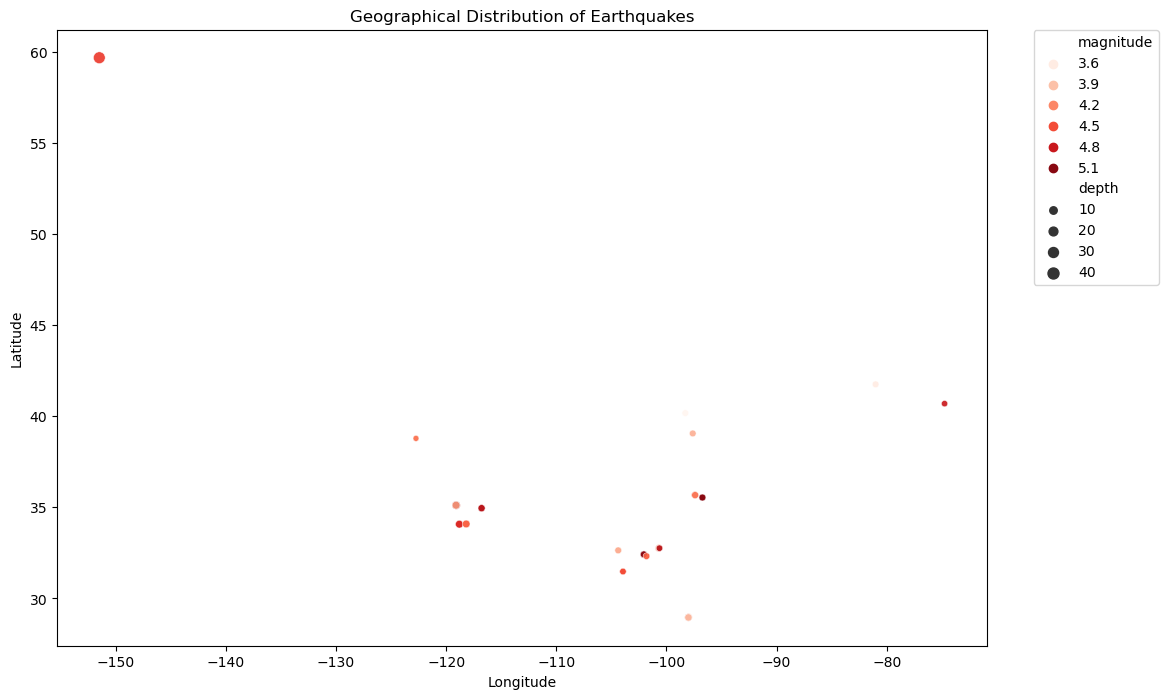

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='magnitude', size='depth', data=cleaned_df, palette='Reds', alpha=0.9)
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

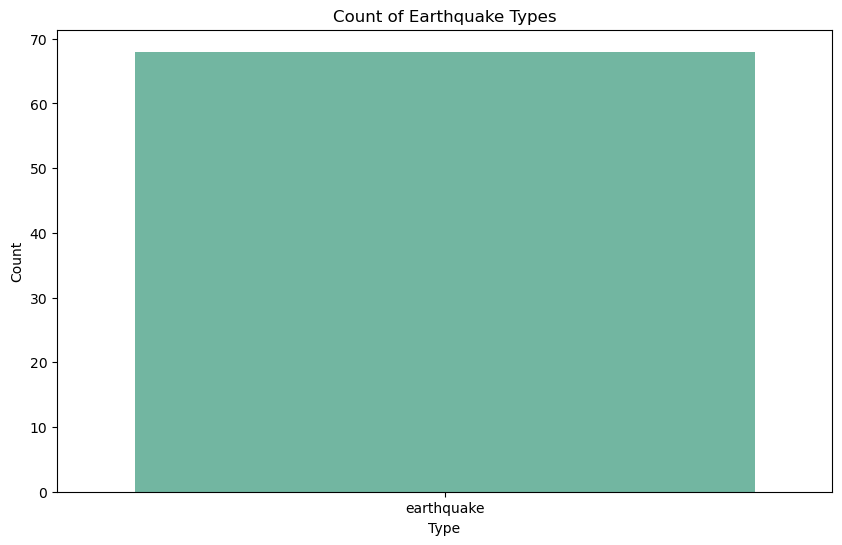

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=cleaned_df, palette='Set2')
plt.title('Count of Earthquake Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


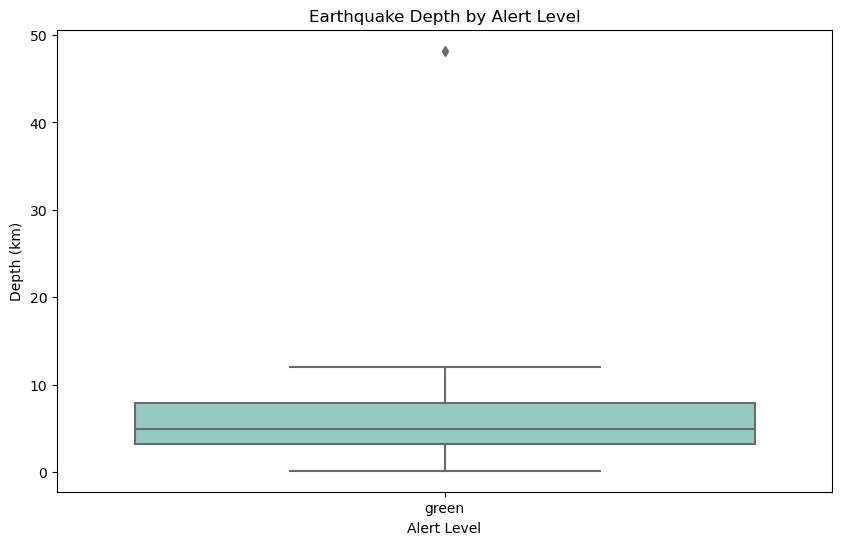

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='alert', y='depth', data=cleaned_df, palette='Set3')
plt.title('Earthquake Depth by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Depth (km)')
plt.show()

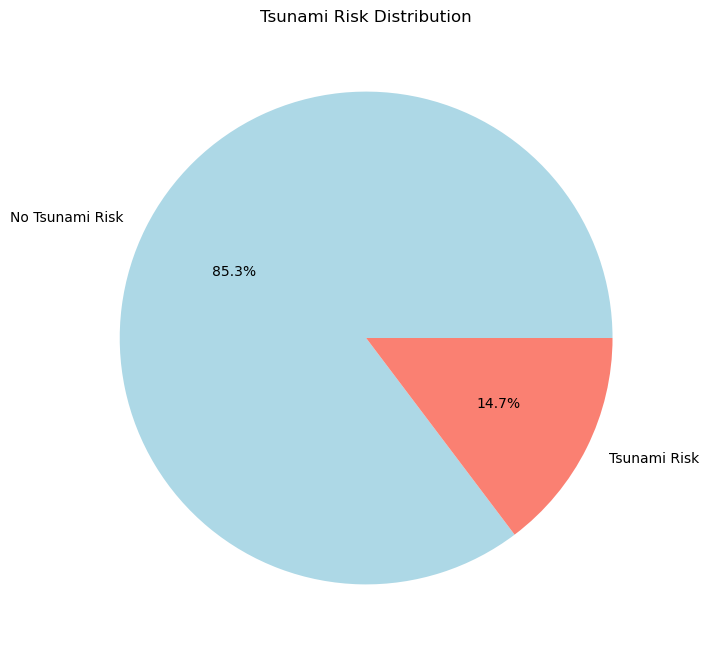

In [15]:
tsunami_counts = cleaned_df['tsunami'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(tsunami_counts, labels=['No Tsunami Risk', 'Tsunami Risk'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Tsunami Risk Distribution')
plt.show()

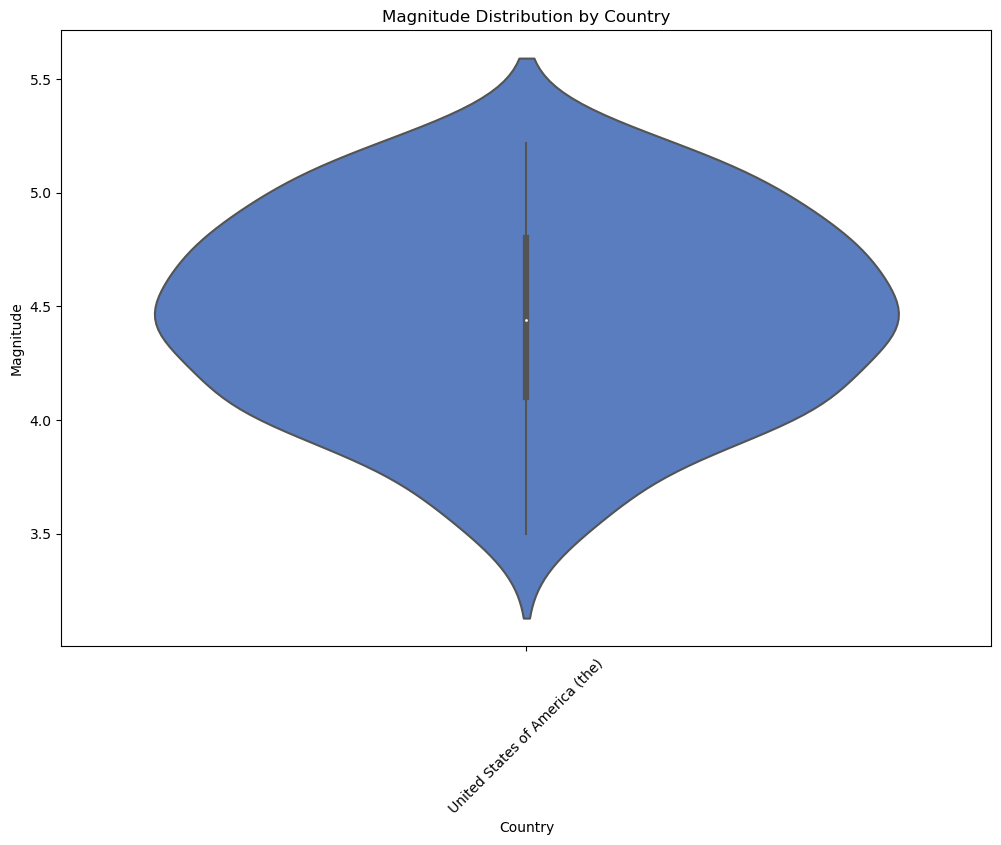

In [16]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='country', y='magnitude', data=cleaned_df, palette='muted')
plt.title('Magnitude Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()

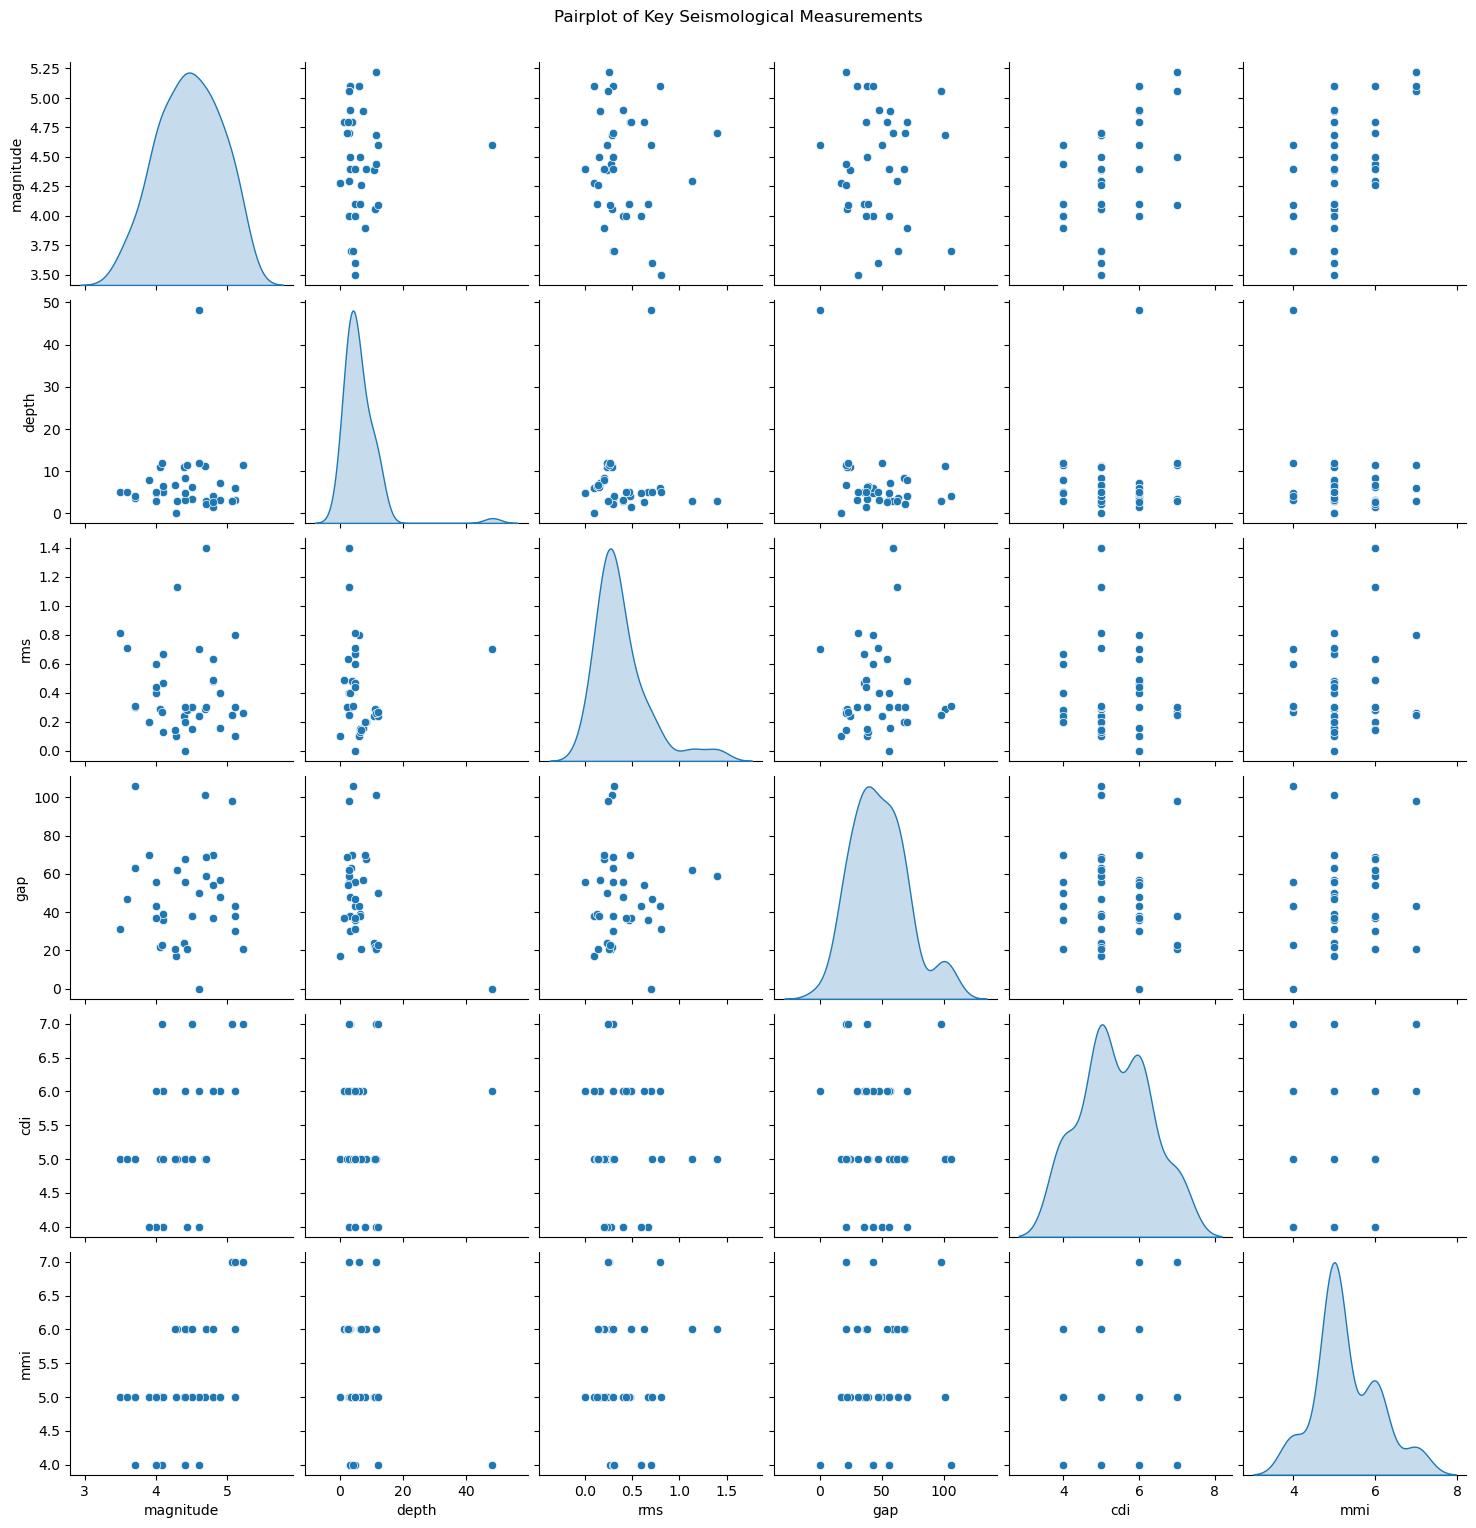

()

In [17]:
sns.pairplot(cleaned_df[['magnitude', 'depth', 'rms', 'gap', 'cdi', 'mmi']], diag_kind='kde')
plt.suptitle('Pairplot of Key Seismological Measurements', y=1.02)
plt.show()
/

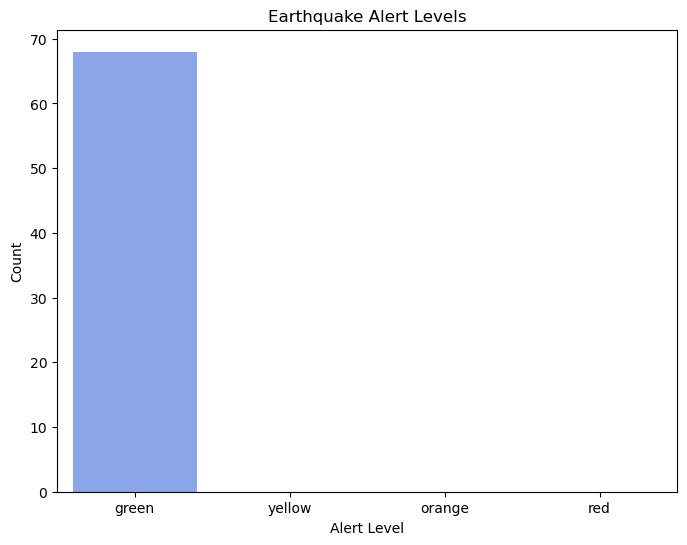

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='alert', data=cleaned_df, order=['green', 'yellow', 'orange', 'red'], palette='coolwarm')
plt.title('Earthquake Alert Levels')
plt.xlabel('Alert Level')
plt.ylabel('Count')
plt.show()


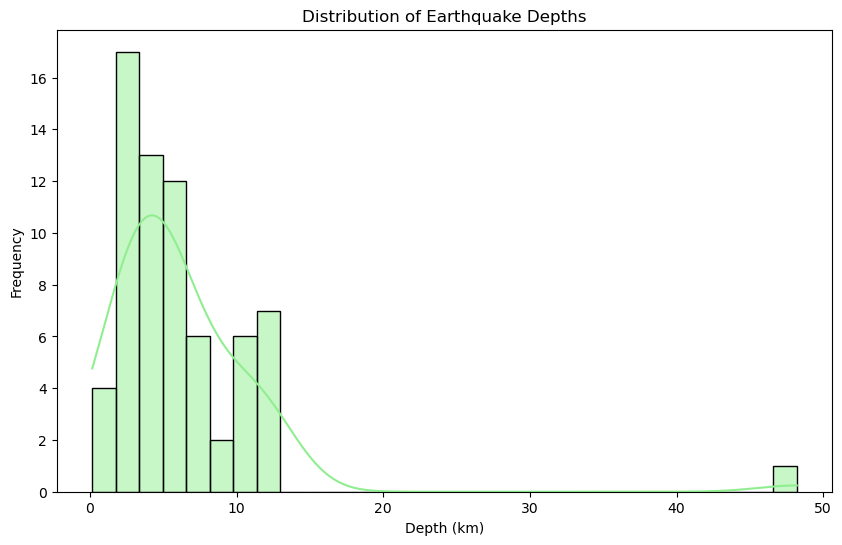

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['depth'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

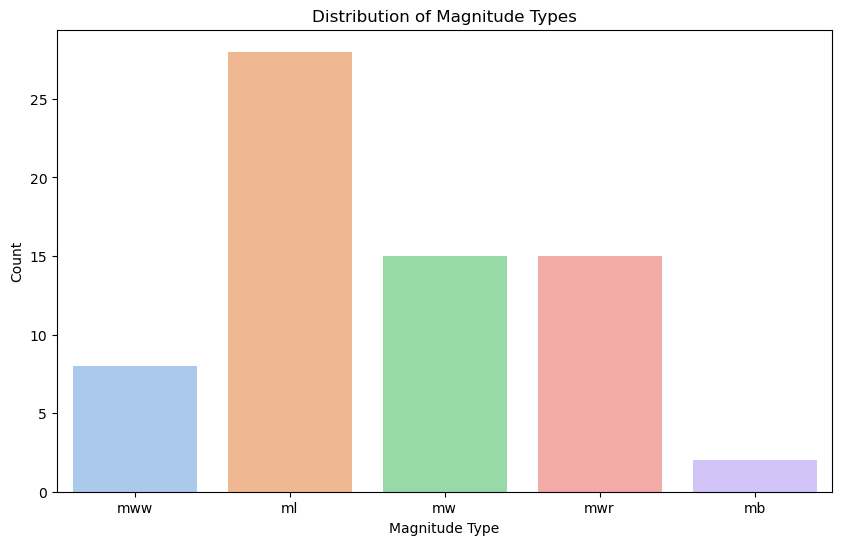

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='magType', data=cleaned_df, palette='pastel')
plt.title('Distribution of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()

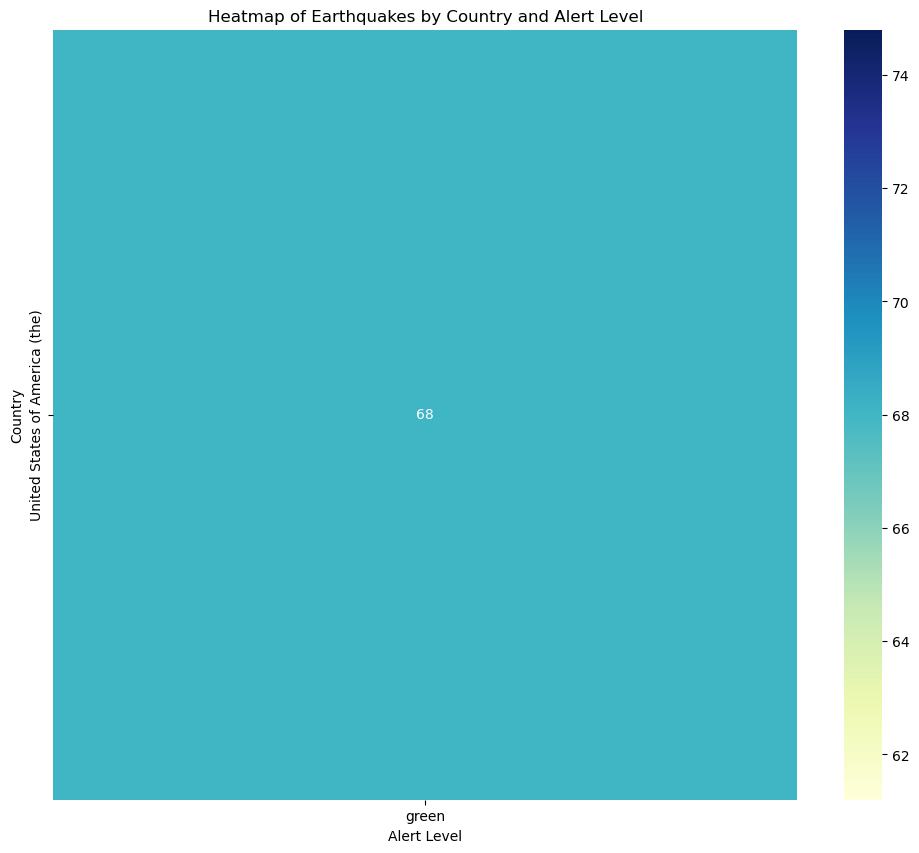

In [23]:
heatmap_data = cleaned_df.pivot_table(index='country', columns='alert', values='id', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Earthquakes by Country and Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Country')
plt.show()

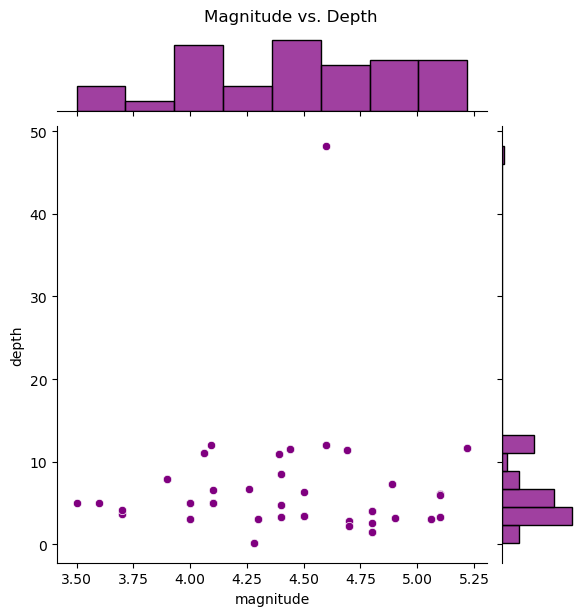

In [24]:
sns.jointplot(x='magnitude', y='depth', data=cleaned_df, kind='scatter', color='purple')
plt.suptitle('Magnitude vs. Depth', y=1.02)
plt.show()


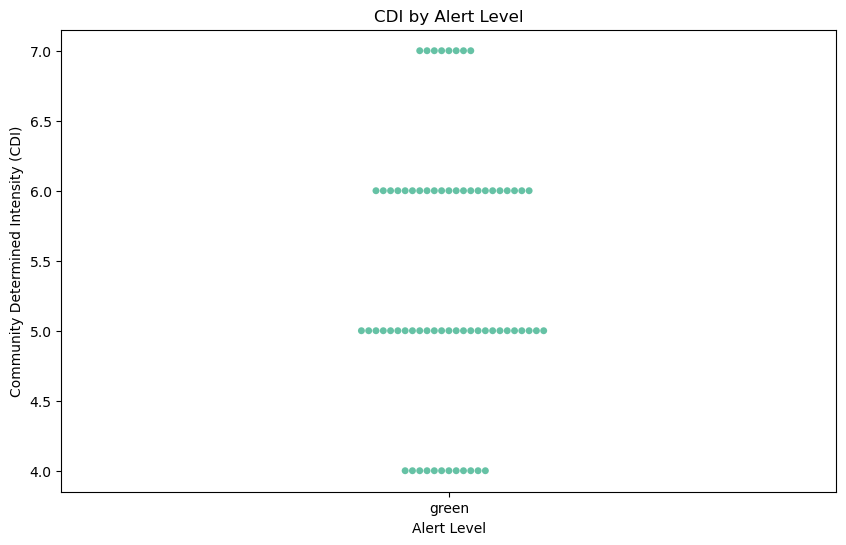

In [25]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='alert', y='cdi', data=cleaned_df, palette='Set2')
plt.title('CDI by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Community Determined Intensity (CDI)')
plt.show()

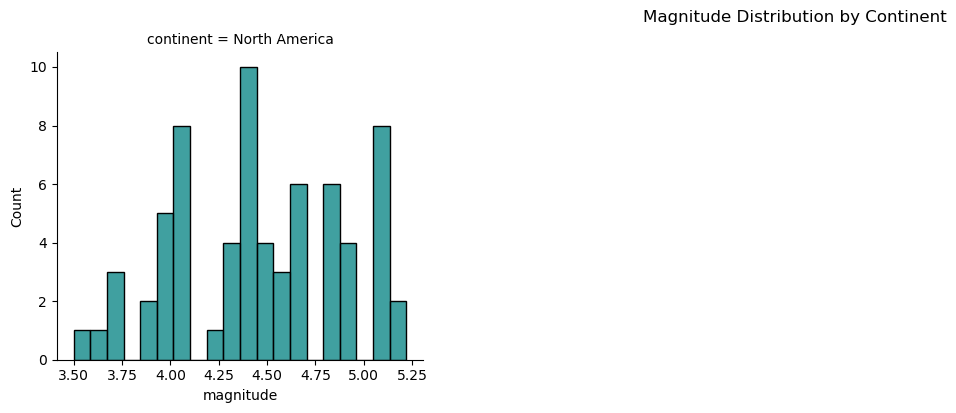

In [26]:
g = sns.FacetGrid(cleaned_df, col='continent', col_wrap=4, height=4)
g.map(sns.histplot, 'magnitude', bins=20, color='teal')
g.fig.suptitle('Magnitude Distribution by Continent', y=1.02)
plt.show()

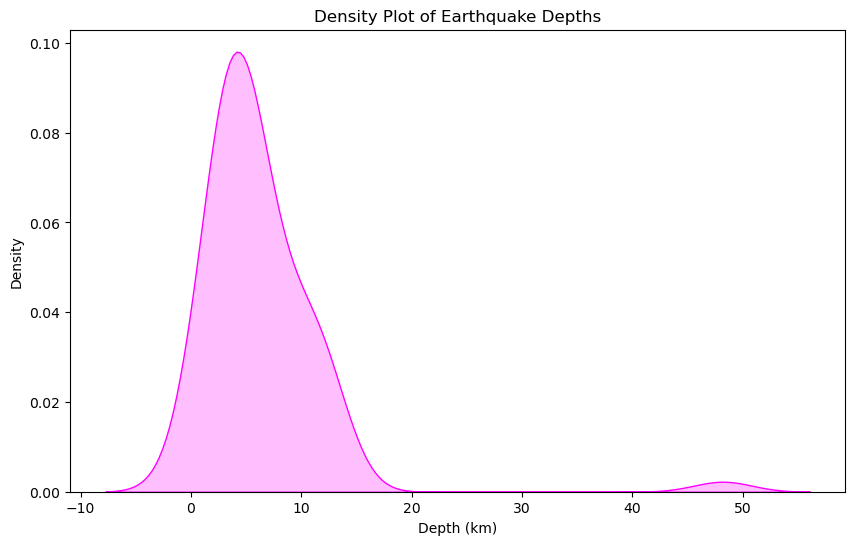

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(cleaned_df['depth'], shade=True, color='magenta')
plt.title('Density Plot of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Density')
plt.show()


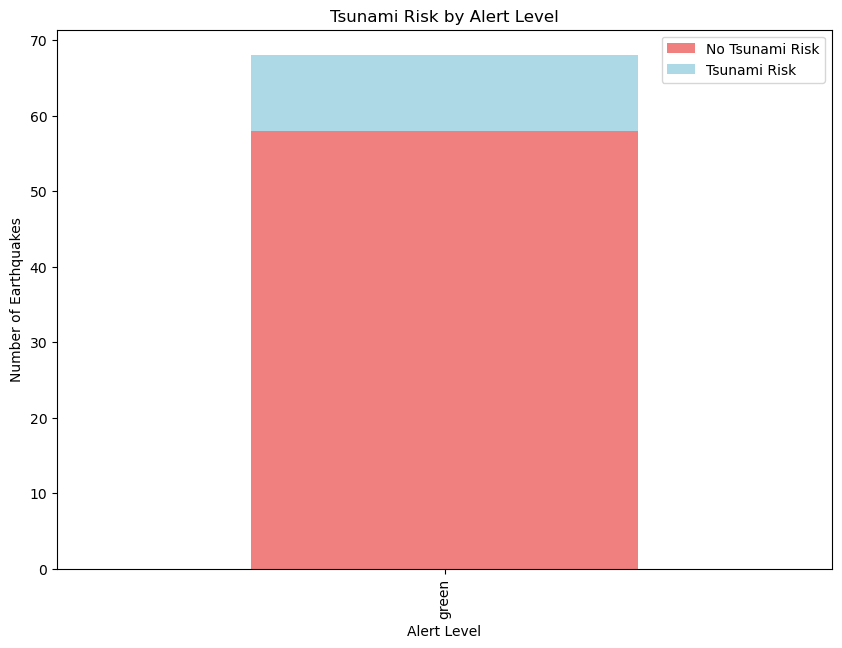

In [28]:
tsunami_alert = cleaned_df.groupby(['alert', 'tsunami']).size().unstack(fill_value=0)

tsunami_alert.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightcoral', 'lightblue'])
plt.title('Tsunami Risk by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Number of Earthquakes')
plt.legend(['No Tsunami Risk', 'Tsunami Risk'])
plt.show()

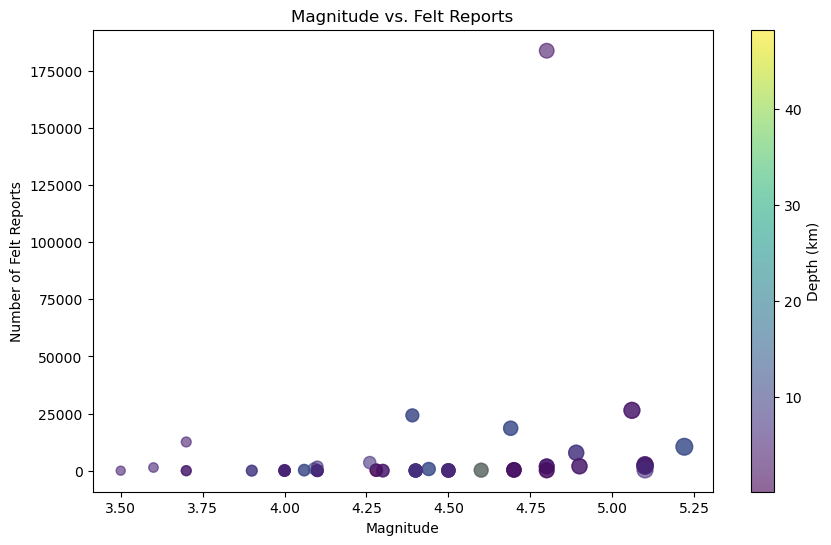

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['magnitude'], cleaned_df['felt'], alpha=0.6, s=cleaned_df['magnitude']**3, c=cleaned_df['depth'], cmap='viridis')
plt.colorbar(label='Depth (km)')
plt.title('Magnitude vs. Felt Reports')
plt.xlabel('Magnitude')
plt.ylabel('Number of Felt Reports')
plt.show()

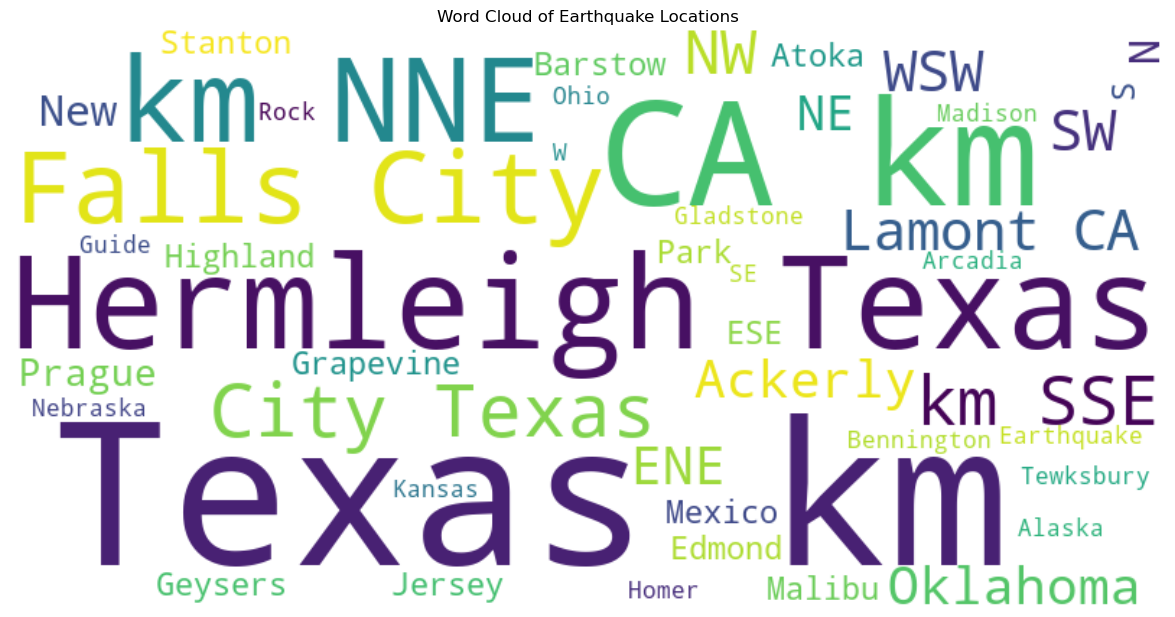

In [30]:
text = ' '.join(cleaned_df['place'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Earthquake Locations')
plt.show()

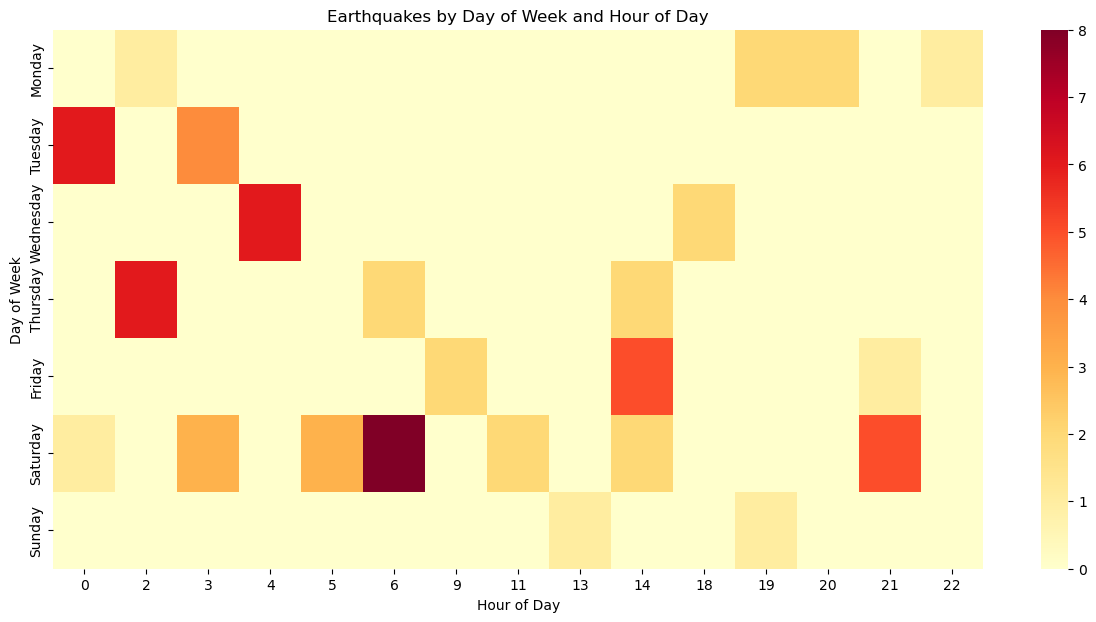

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], errors='coerce')

# Extract day of the week and hour
cleaned_df['day_of_week'] = cleaned_df['date'].dt.day_name()
cleaned_df['hour'] = cleaned_df['date'].dt.hour

# Pivot table for the heatmap
heatmap_data = cleaned_df.pivot_table(index='day_of_week', columns='hour', values='id', aggfunc='count', fill_value=0)

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Earthquakes by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


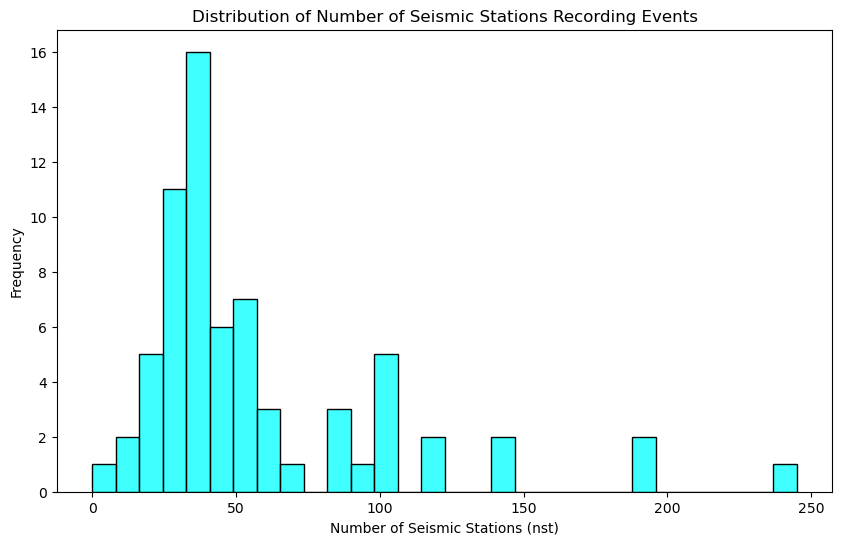

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['nst'], bins=30, kde=False, color='cyan')
plt.title('Distribution of Number of Seismic Stations Recording Events')
plt.xlabel('Number of Seismic Stations (nst)')
plt.ylabel('Frequency')
plt.show()

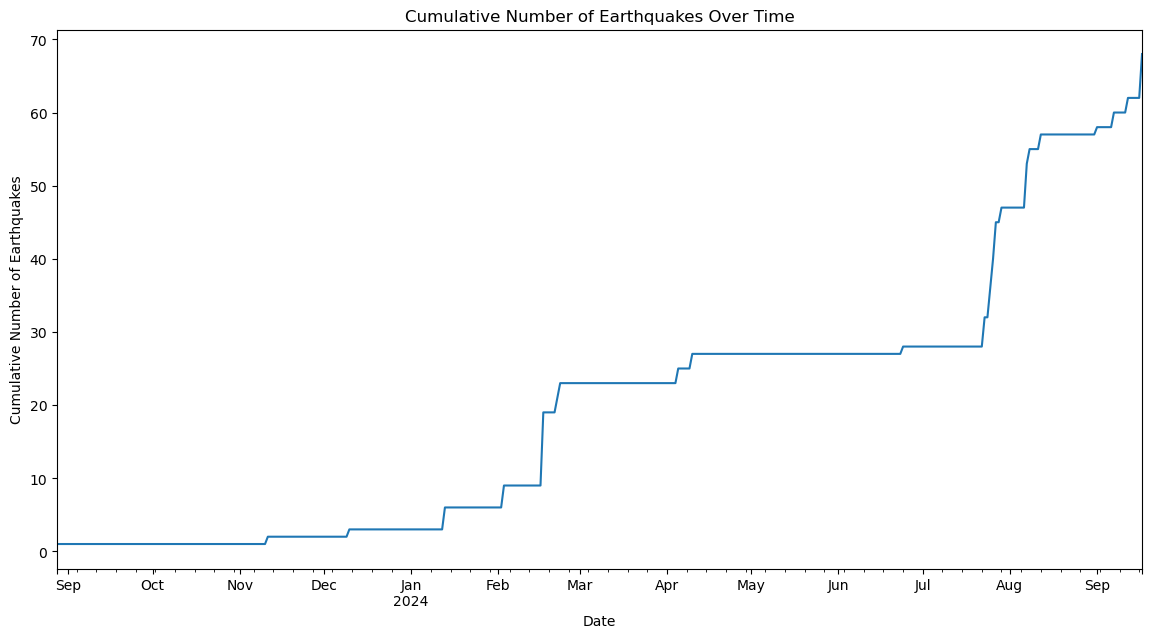

In [36]:
cumulative_eq = cleaned_df.set_index('date').resample('D').size().cumsum()

plt.figure(figsize=(14, 7))
cumulative_eq.plot()
plt.title('Cumulative Number of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Earthquakes')
plt.show()

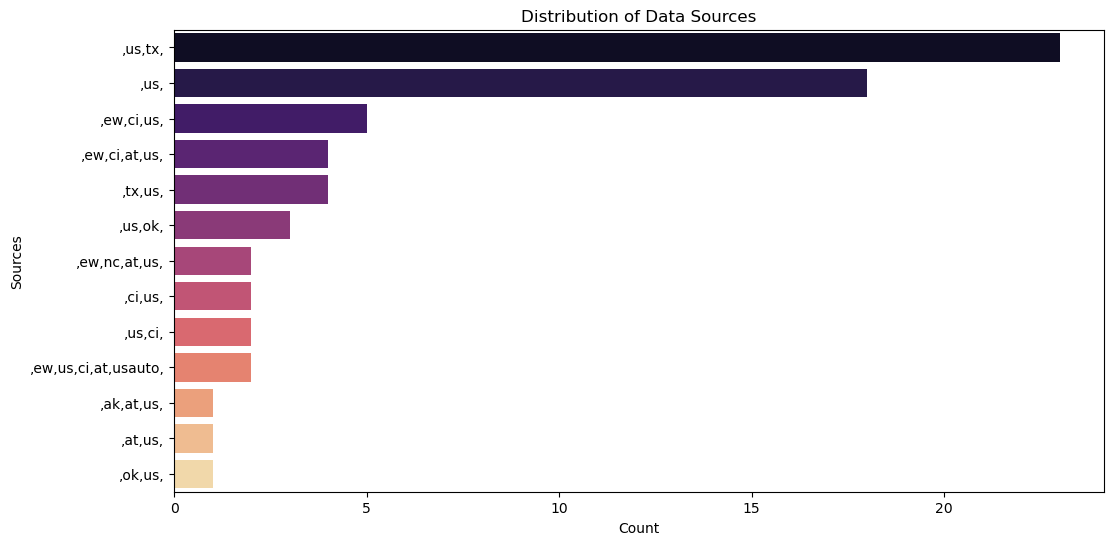

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(y='sources', data=cleaned_df, order=cleaned_df['sources'].value_counts().index, palette='magma')
plt.title('Distribution of Data Sources')
plt.xlabel('Count')
plt.ylabel('Sources')
plt.show()

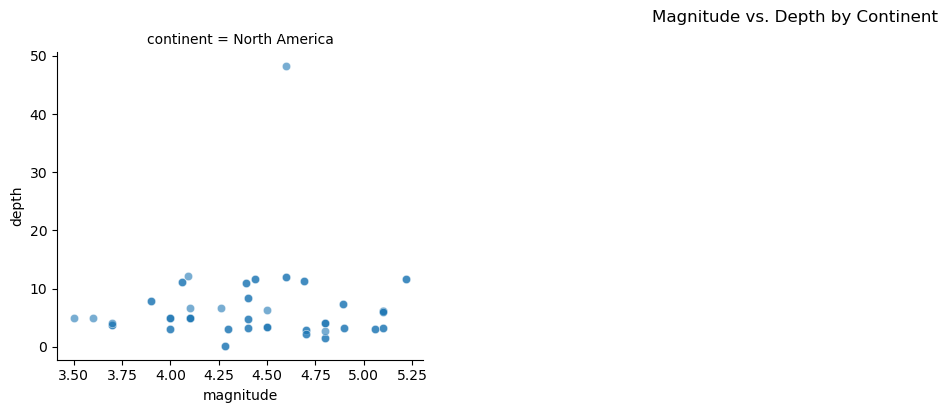

In [38]:
g = sns.FacetGrid(cleaned_df, col='continent', col_wrap=4, height=4)
g.map(sns.scatterplot, 'magnitude', 'depth', alpha=0.6)
g.fig.suptitle('Magnitude vs. Depth by Continent', y=1.02)
plt.show()

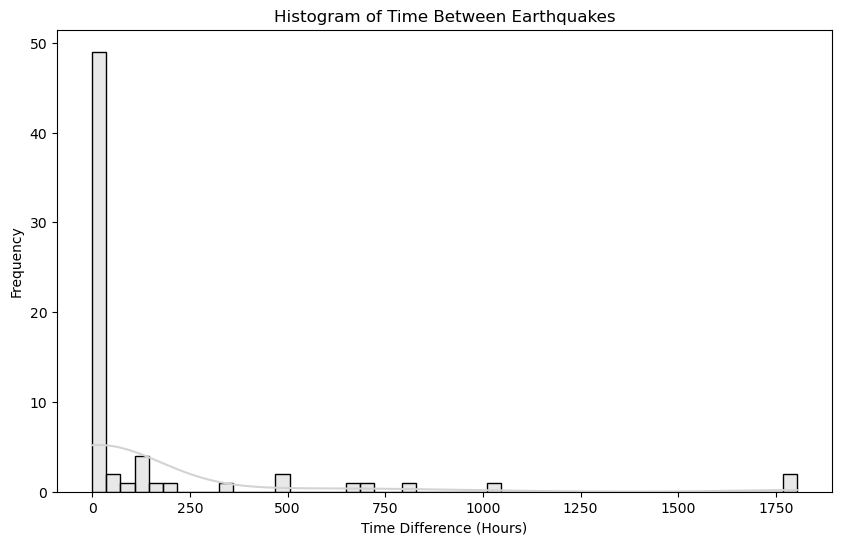

In [39]:
cleaned_df = cleaned_df.sort_values('date')
cleaned_df['time_diff'] = cleaned_df['date'].diff().dt.total_seconds().div(3600)

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['time_diff'].dropna(), bins=50, kde=True, color='lightgrey')
plt.title('Histogram of Time Between Earthquakes')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')
plt.show()


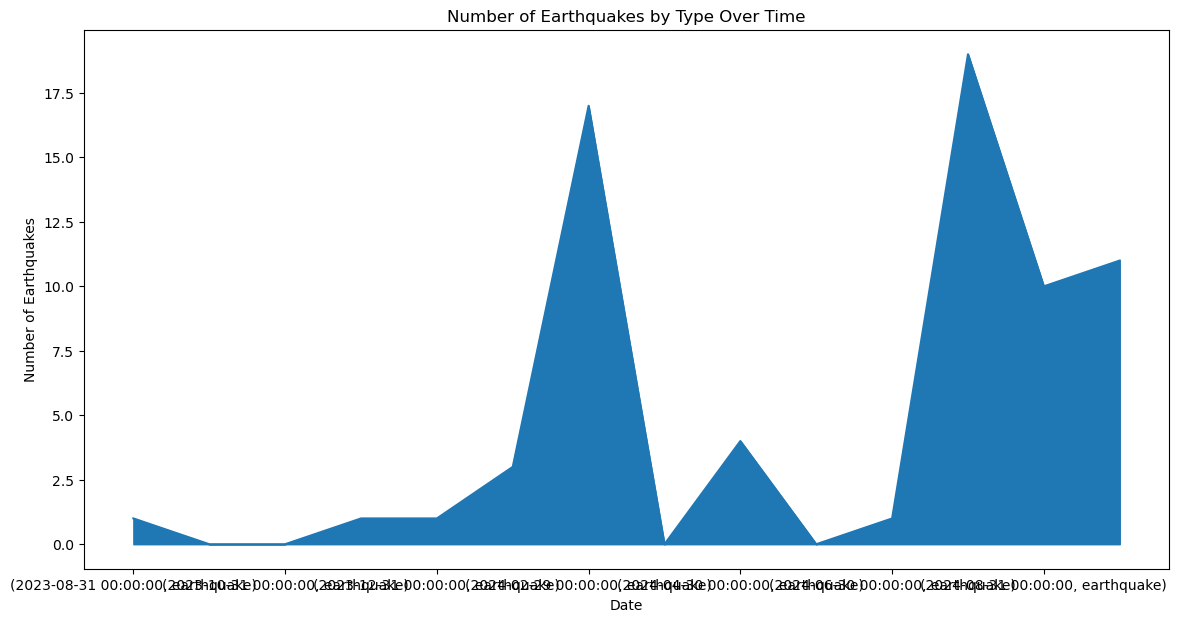

In [42]:
eq_types_over_time = cleaned_df.set_index('date').groupby(['type']).resample('M').size().unstack(level=0).fillna(0)

eq_types_over_time.plot(kind='area', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Number of Earthquakes by Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()

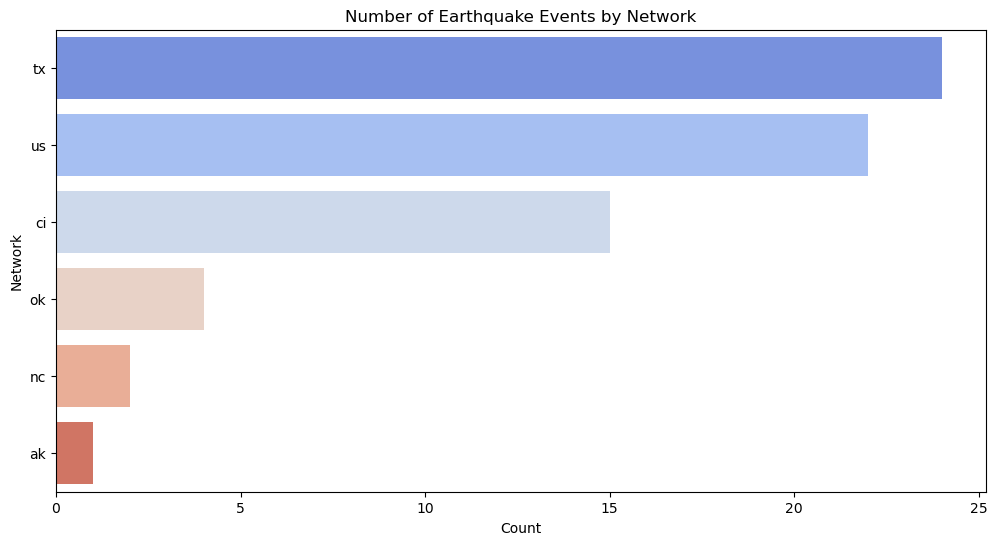

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(y='net', data=cleaned_df, order=cleaned_df['net'].value_counts().index, palette='coolwarm')
plt.title('Number of Earthquake Events by Network')
plt.xlabel('Count')
plt.ylabel('Network')
plt.show()

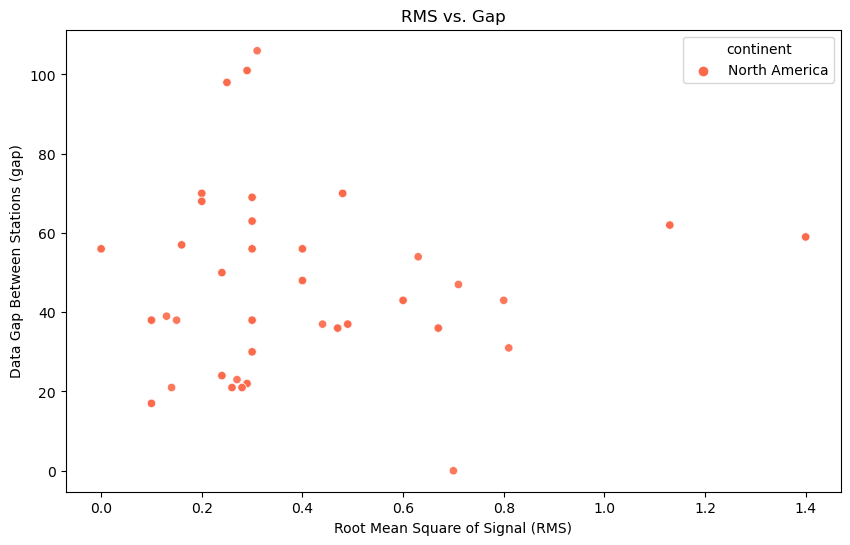

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rms', y='gap', hue='continent', data=cleaned_df, palette='Reds', alpha=0.9)
plt.title('RMS vs. Gap')
plt.xlabel('Root Mean Square of Signal (RMS)')
plt.ylabel('Data Gap Between Stations (gap)')
plt.show()

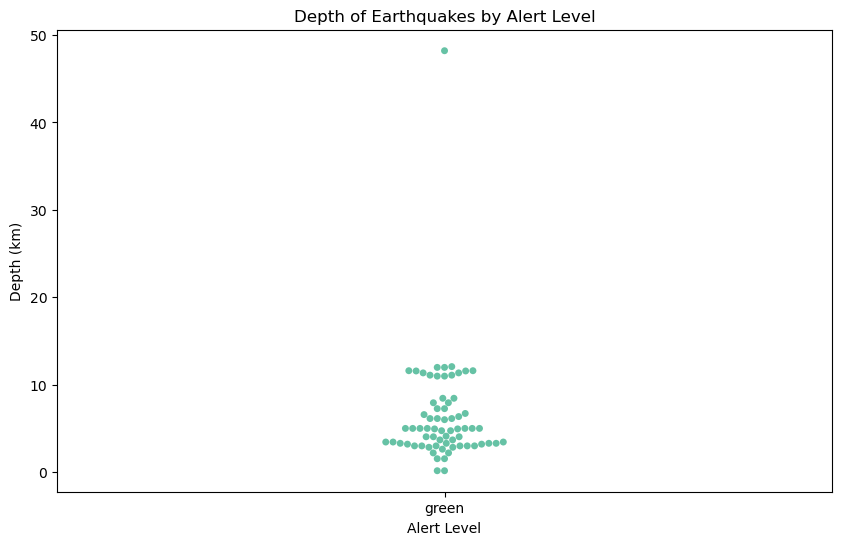

In [44]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='alert', y='depth', data=cleaned_df, palette='Set2',color='#00BFFF')
plt.title('Depth of Earthquakes by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Depth (km)')
plt.show()

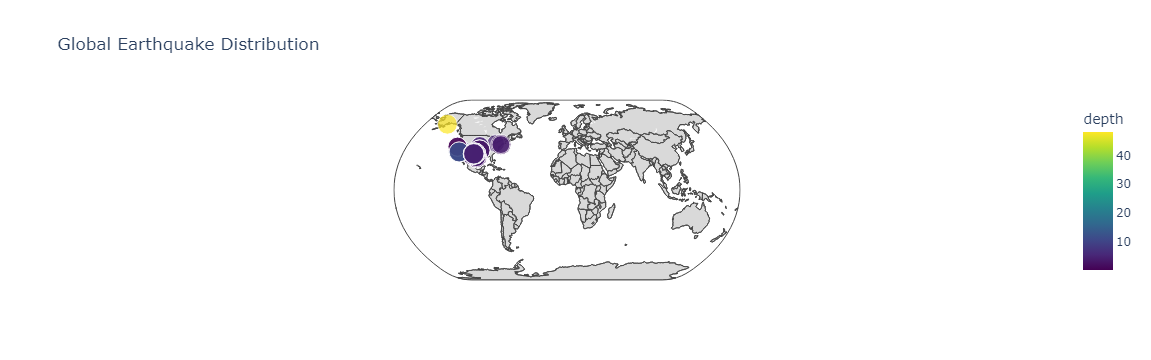

In [45]:
fig = px.scatter_geo(
    cleaned_df,
    lat='latitude',
    lon='longitude',
    color='depth',
    size='magnitude',
    hover_name='place',
    hover_data={
        'magnitude': True,
        'depth': True,
        'date': True,
        'country': True
    },
    color_continuous_scale='Viridis',
    projection='natural earth',
    title='Global Earthquake Distribution',
    size_max=15
)
fig.update_layout(
    legend_title='Depth (km)',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)',
        showcountries=True,
    )
)

fig.show()


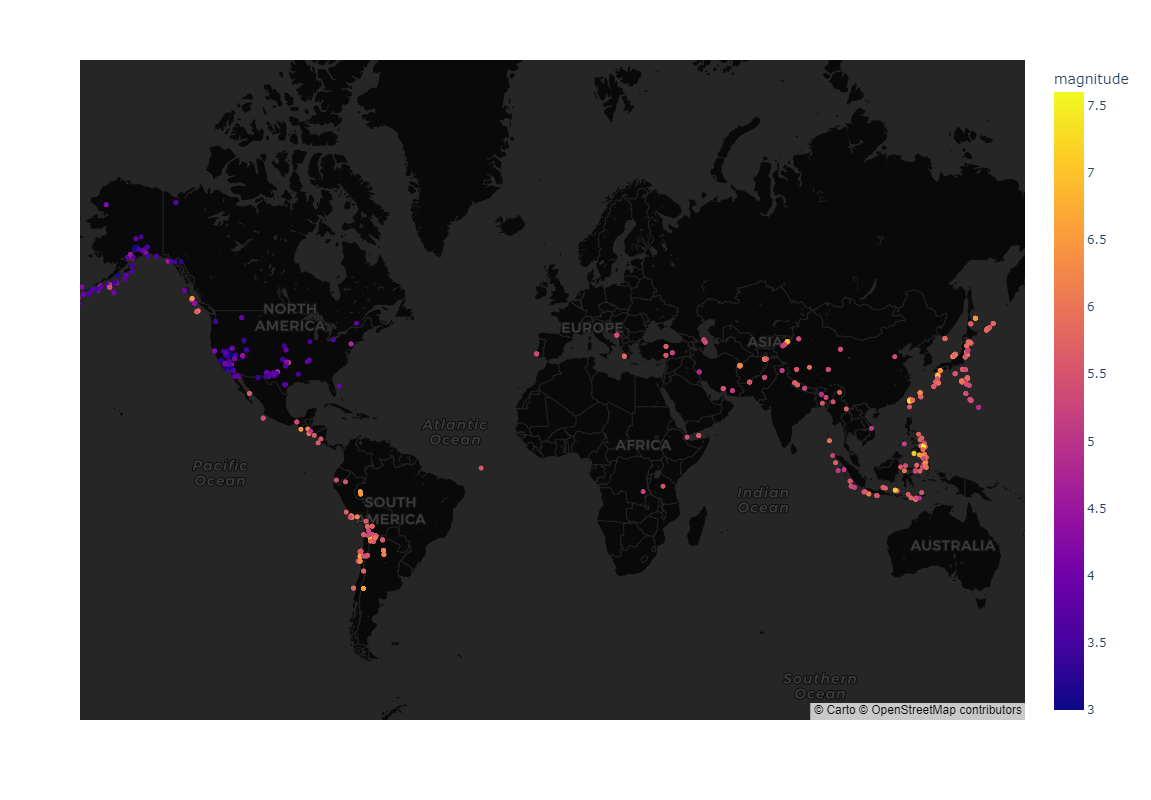

In [48]:
from plotly import express

express.scatter_mapbox(data_frame=df, lat='latitude', lon='longitude', color='magnitude', hover_name='location', mapbox_style='carto-darkmatter', zoom=1, height=800)